In [ ]:
# Cluster-similar-Houses


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv("house_rental_data.csv.txt")
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [ ]:
# Q 1).Data cleaning & getting rid of irrelevant information before clustering

In [4]:
data_cleaned = data.drop(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', ], axis=1)

data_cleaned = pd.get_dummies(data_cleaned, columns=['Price'])
print(data_cleaned.head())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cleaned)
print(scaled_features)

   Unnamed: 0  Price_6100  Price_11900  Price_12000  Price_13000  Price_17000  \
0           1       False        False        False        False        False   
1           2       False        False        False        False        False   
2           3       False        False        False        False        False   
3           4       False        False        False        False        False   
4           5       False        False        False        False        False   

   Price_19000  Price_20000  Price_21000  Price_22000  ...  Price_158000  \
0        False        False        False        False  ...         False   
1        False        False        False        False  ...         False   
2        False        False        False        False  ...         False   
3        False        False        False        False  ...         False   
4        False        False        False        False  ...         False   

   Price_160000  Price_168000  Price_170000  Price_18000

In [ ]:
# Q 2).Finding the optimal value of k

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

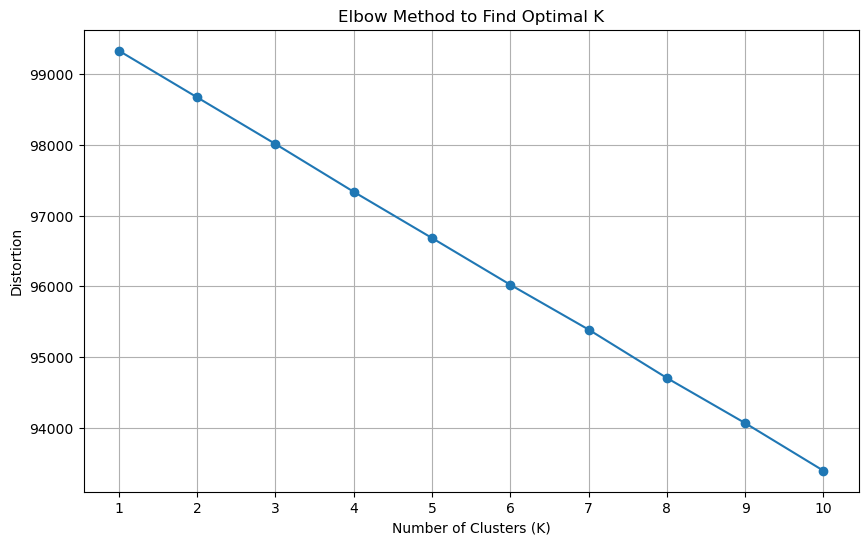

In [5]:
def find_optimal_k(data, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

max_clusters = 10
distortions = find_optimal_k(scaled_features, max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method to Find Optimal K')
plt.xticks(np.arange(1, max_clusters + 1))
plt.grid(True)
plt.show()

optimal_k = 3

In [ ]:
# Q 3).Storing cluster to which the house belongs along with the data

In [6]:
numerical_cols = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']


scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


def cluster_houses(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[numerical_cols])
    return data

num_clusters = 4

clustered_data = cluster_houses(data, num_clusters)
print(clustered_data.head())

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


   Unnamed: 0      Sqft     Floor  TotalFloor   Bedroom  Living.Room  \
0           1 -0.456393 -1.014897   -0.772347 -0.828956     0.402694   
1           2  0.791798 -0.242042   -0.772347  1.151328     0.402694   
2           3 -0.507434 -0.242042   -0.772347 -0.828956     0.402694   
3           4 -0.089824 -1.014897   -0.772347  0.161186     0.402694   
4           5 -0.730160  1.303669    0.629803  0.161186     0.402694   

   Bathroom     Price  Cluster  
0  0.276918  0.000370        1  
1  0.276918  0.449714        1  
2 -1.187117 -0.111966        2  
3  0.276918 -0.477058        1  
4  0.276918 -0.477058        0  
